In [1]:
import sys
sys.path.insert(0, "/Users/rstiskalek/Projects/candel")

import numpy as np
import matplotlib.pyplot as plt
import candel

%load_ext autoreload
%autoreload 2

All paths, hyperparameters, and model or data-specific options are controlled via configuration files such as the example below.

This configuration file specifies:
- Paths and Environment: Sets root paths for the project and Python executable, and identifies the compute environment (local or rusty).
- Inference Settings: Controls sampling parameters such as number of chains, warmup steps, total samples, and whether to compute evidence or log-density.
- Peculiar Velocity Model: Defines the velocity model to use (e.g. "constant") and related options such as galaxy bias.
- Model Specification: Defines grid resolutions for model parameters and prior distributions for key parameters in the Tully-Fisher relation, cosmic flows, and supernova calibration. Supports various prior types, including delta, normal, Jeffreys, and uniform distributions.
- Data I/O: Manages input/output paths and catalogue-specific options for different datasets (e.g., CF4, Pantheon+, Clusters). Includes magnitude and $\eta$ selection cuts, redshift limits, sky region constraints, and file paths for line-of-sight velocity reconstructions.
- Static Data Access: Specifies unfiltered access to main catalogues for general-purpose use, bypassing cuts (such as precomputing the LOS density and velocity).
- Reconstruction Parameters: Sets parameters for real-space reconstruction grids and links to precomputed density and velocity fields from external sources like Carrick (2015).

This structure allows consistent control over model assumptions, data preprocessing, and inference logic, making the analysis reproducible and easily portable across environments.

In [2]:
config_path = "/Users/rstiskalek/Projects/CANDEL/scripts/runs/config.toml"
data = candel.pvdata.load_PV_dataframes(config_path,)
data

2025-05-13 22:01:48 replacing prior of `alpha` with a delta function.
2025-05-13 22:01:48 replacing prior of `beta` with a delta function.
2025-05-13 22:01:48 initially loaded 276 clusters.
2025-05-13 22:01:48 removed 26 clusters, thus 250 remain.
2025-05-13 22:01:48 subtracting the mean logT from the data.
2025-05-13 22:01:48 subtracting the mean logY from the data.
2025-05-13 22:01:48 setting the LOS radial grid from 0.1 to 1001 with 501 steps.


<PVDataFrame: 250 galaxies>

In [3]:
model = candel.model.Clusters_DistMarg(config_path,)
model_args = (data, )
samples, log_density = candel.run_pv_inference(model, model_args, )

2025-05-13 22:01:50 replacing prior of `alpha` with a delta function.
2025-05-13 22:01:50 replacing prior of `beta` with a delta function.
2025-05-13 22:01:50 `logY` is not used in the model. Disabling its prior.
2025-05-13 22:01:50 running inference on devices: cpu(cpu)
2025-05-13 22:01:50 using NumPyro platform: CPU


Batched log densities: 100%|██████████| 500/500 [00:01<00:00, 425.61it/s]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
      A_CL     -0.35      0.02     -0.35     -0.38     -0.31    887.60      1.00
      B_CL      1.89      0.08      1.89      1.76      2.01    796.32      1.00
  sigma_mu      0.57      0.03      0.57      0.53      0.63    741.04      1.00
   sigma_v    599.27    460.34    463.21     77.31   1237.59    718.26      1.00
  Vext_mag    777.64    467.22    740.59      1.28   1446.98    421.48      1.00
  Vext_ell     91.54     70.03     72.55      1.14    165.93    960.59      1.00
    Vext_b     -6.92     26.34     -7.22    -52.48     34.92   1393.00      1.00

2025-05-13 22:03:16 BIC & AIC calculation found 7 parameters and 2500 data points.
2025-05-13 22:03:16 computing harmonic evidence from 7 parameters: ['A_CL', 'B_CL', 'sigma_mu', 'sigma_v', 'Vext_mag', 'Vext_ell', 'Vext_b']


Training NF: 100%|██████████| 50/50 [00:03<00:00, 13.43it/s]


2025-05-13 22:03:25 BIC:          5083.29
2025-05-13 22:03:25 AIC:          5042.52
2025-05-13 22:03:25 Laplace lnZ:  -2500.41 +- 1.00
2025-05-13 22:03:25 Harmonic lnZ: -2505.31 +- 0.48
2025-05-13 22:03:25 output directory is `/Users/rstiskalek/Projects/CANDEL/results`.
2025-05-13 22:03:26 saved samples to `/Users/rstiskalek/Projects/CANDEL/results/test.hdf5`.
2025-05-13 22:03:26 saving a corner plot to `/Users/rstiskalek/Projects/CANDEL/results/test.png`


/Users/rstiskalek/Projects/candel/candel/util.py:241: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


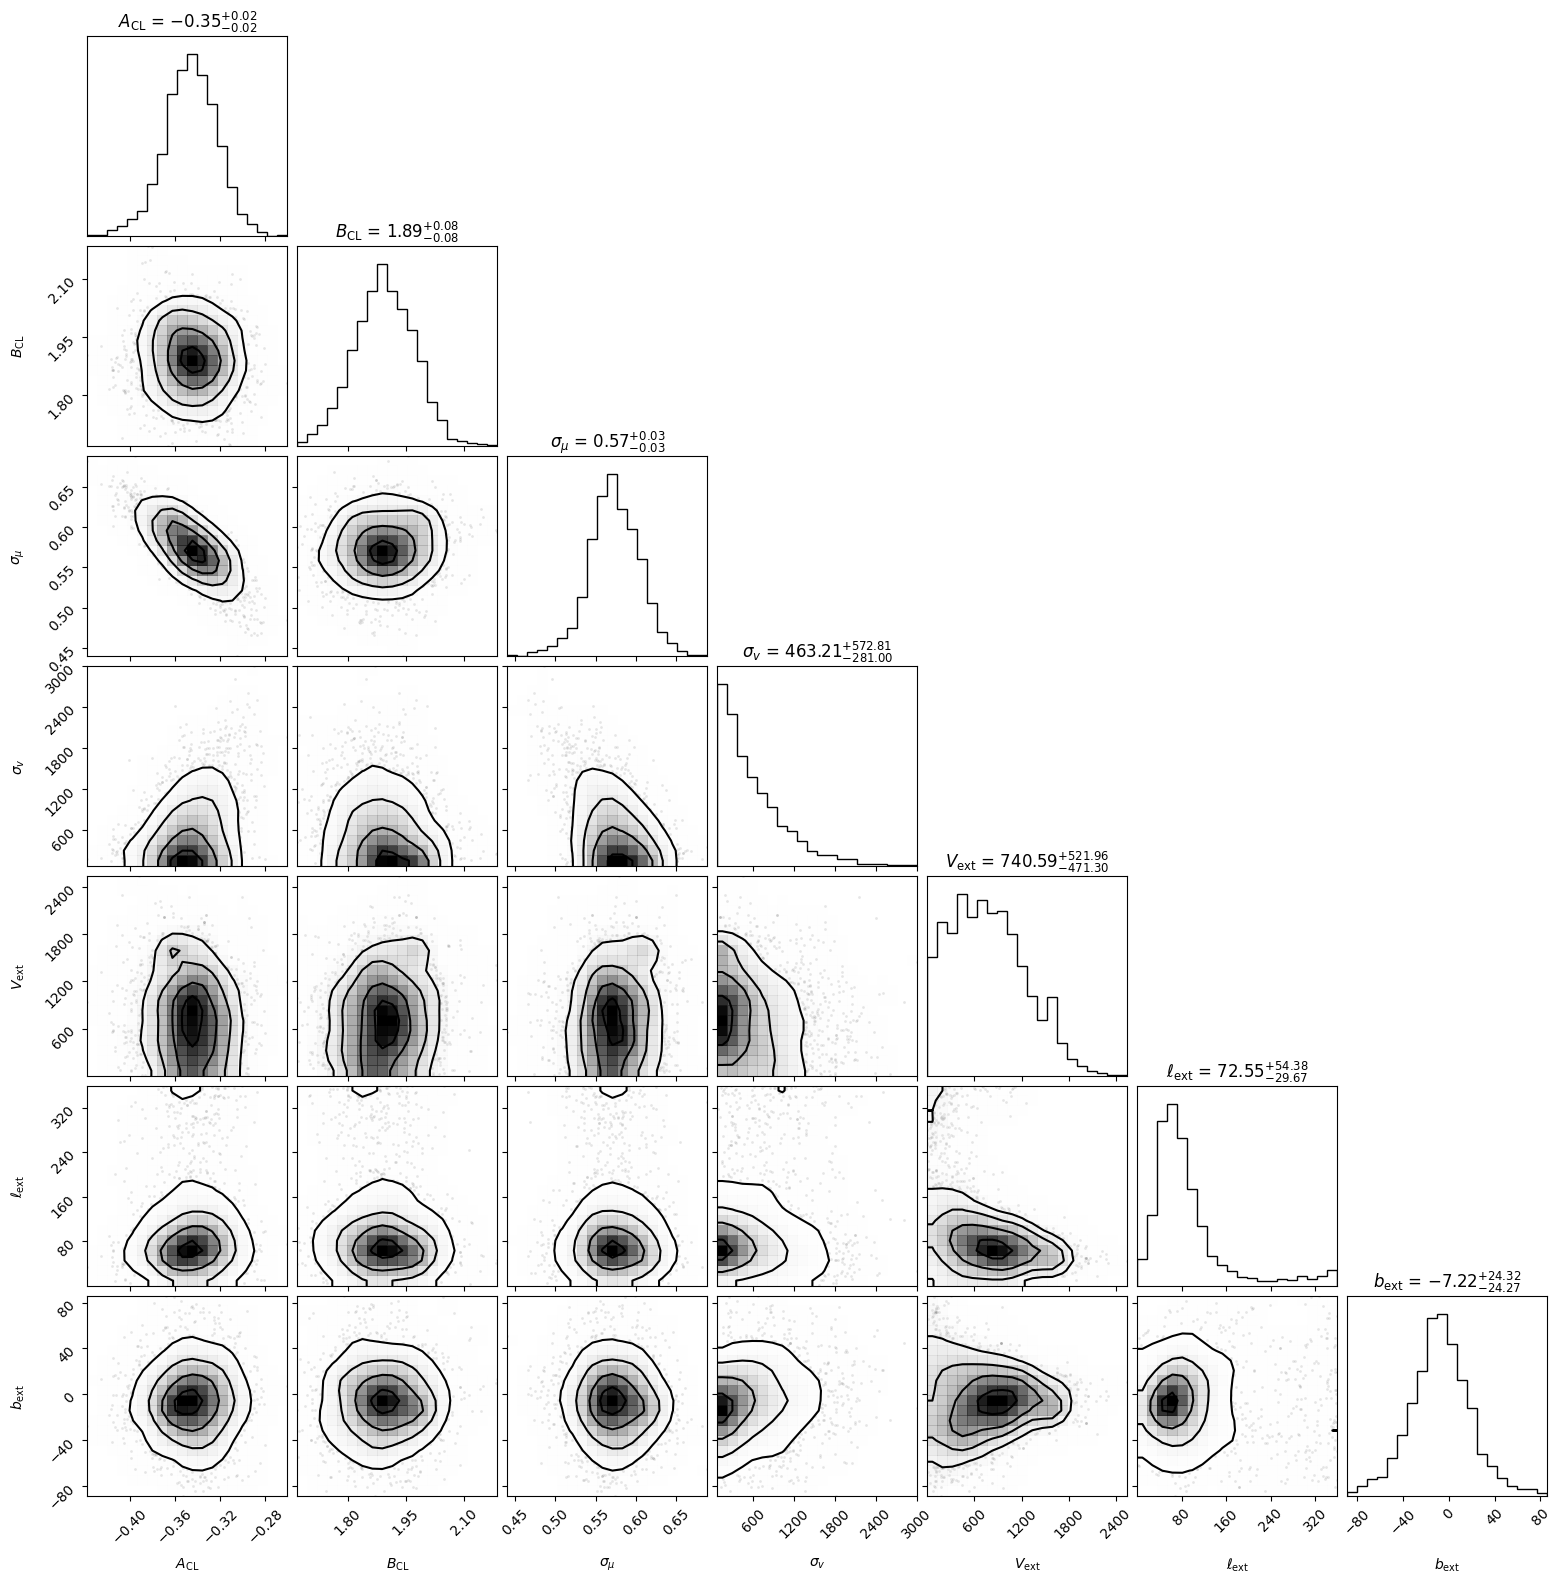

In [ ]:
candel.plot_corner(
    samples,
    keys=["A_CL", "B_CL", "C_CL", "sigma_mu", "sigma_v", "Vext_mag", "Vext_ell", "Vext_b",
          ],
    smooth=1,
    filename="corner_clusters.png",
    )